<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/07_Okt_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import phik
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from phik import resources, report
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.feature_selection import *
from sklearn.preprocessing import *

In [61]:
plt.style.use("seaborn-whitegrid")

df = pd.read_csv("train.csv")
df.head(1)

<ipython-input-61-b67739fec75c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,0.55,0.4125,0.1625,1.715145,0.609514,0.396893,0.56699,4.0


In [62]:
df['Sex'].unique()

array(['I', 'F', 'M', 'Diameter'], dtype=object)

In [63]:
lbl = LabelEncoder()
df['Sex'] = lbl.fit_transform(df['Sex'])
X = df.drop(["Age", 'id'], axis=1)
y = df["Age"]

In [64]:
X.head(1)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,2,0.55,0.4125,0.1625,1.715145,0.609514,0.396893,0.56699


In [65]:
mor = mutual_info_regression(X, y)
mor = pd.Series(mor, index=X.columns)
mor.sort_values(ascending=False)

,0
Shell Weight,0.598005
Height,0.538764
Weight,0.528540
Viscera Weight,0.517617
Length,0.516276
Diameter,0.515604
Shucked Weight,0.480110
Sex,0.258140


In [66]:
def make_mi_score(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


discrete_features = X.dtypes == int
mi_scores = make_mi_score(X, y, discrete_features)
mi_scores

,MI Scores
Shell Weight,0.600271
Diameter,0.538839
Height,0.538708
Weight,0.532703
Viscera Weight,0.516743
Length,0.514808
Shucked Weight,0.477137
Sex,0.268873


In [67]:
discrete_features

,0
Sex,True
Length,False
Diameter,False
Height,False
Weight,False
Shucked Weight,False
Viscera Weight,False
Shell Weight,False


In [68]:
df.phik_matrix()

interval columns not set, guessing: ['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,1.000000,0.010381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009020,0.000000
Sex,0.010381,1.000000,0.601606,0.604976,0.602994,0.613461,0.586382,0.615784,0.614619,0.548483
Length,0.000000,0.601606,1.000000,0.979057,0.927127,0.924847,0.903921,0.916083,0.903091,0.740078
Diameter,0.000000,0.604976,0.979057,1.000000,0.929649,0.923905,0.901865,0.914269,0.908761,0.744906
Height,0.000000,0.602994,0.927127,0.929649,1.000000,0.888226,0.854691,0.876389,0.890302,0.744832
Weight,0.000000,0.613461,0.924847,0.923905,0.888226,1.000000,0.939295,0.946982,0.938044,0.717981
Shucked Weight,0.000000,0.586382,0.903921,0.901865,0.854691,0.939295,1.000000,0.907980,0.875020,0.676352
Viscera Weight,0.000000,0.615784,0.916083,0.914269,0.876389,0.946982,0.907980,1.000000,0.912680,0.716705
Shell Weight,0.009020,0.614619,0.903091,0.908761,0.890302,0.938044,0.875020,0.912680,1.000000,0.749295
Age,0.000000,0.548483,0.740078,0.744906,0.744832,0.717981,0.676352,0.716705,0.749295,1.000000


In [69]:
X.phik_matrix(y)

/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Shucked Weight is large: 1473. Are you sure this is not an interval variable? Analysis for pairs of variables including Shucked Weight can be slow.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Weight is large: 2272. Are you sure this is not an interval variable? Analysis for pairs of variables including Weight can be slow.
  warnings.warn(


KeyboardInterrupt: 

interval columns not set, guessing: ['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']


<Axes: >

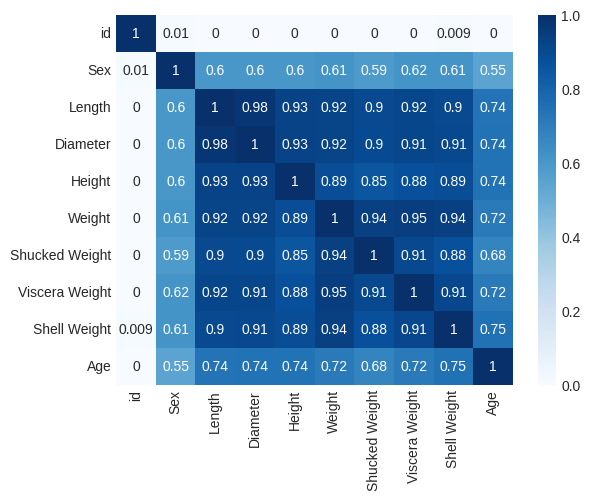

In [70]:
sns.heatmap(df.phik_matrix(), annot=True, cmap='Blues')

interval columns not set, guessing: ['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']


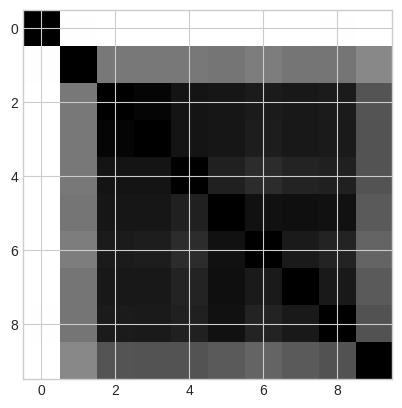

In [78]:
plt.imshow(df.phik_matrix())

In [79]:
import plotly.graph_objects as go
import numpy as np

data = np.random.rand(10, 10)

fig = go.Figure(data=go.Heatmap(
                   z=data,
                   colorscale='Viridis'))
fig.show()

In [82]:
import plotly.graph_objects as go
import numpy as np

data = np.random.rand(10, 10)

text = [[f'{val:.2f}' for val in row] for row in data]

fig = go.Figure(data=go.Heatmap(
                   z=data,
                   text=text,
                   texttemplate="%{text}",
                   textfont={"size":12},
                   colorscale='Viridis'))
fig.show()